In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [4]:
df_1 = pd.DataFrame()
start_year = 2015
end_year = 2017
for year in range(start_year,end_year + 1):
    df_1 = pd.concat((df_1,pd.read_csv(f"../dataGitIgnore/mergedData/movie_{year}_crew_quotes.csv.gz")))
# df_2016 = pd.read_csv("movie_2016_crew_quotes.csv.gz")
# df_201 = pd.read_csv("movie_2016_crew_quotes.csv.gz")
# df_1 = pd.concat((df_2015,df_2016))
df_2 = pd.read_csv("../moviePreprocessing/movie_data_2015_2020.csv")
df_2["Total Gross"] = pd.to_numeric(df_2["Total Gross"].apply(lambda x:x[1:].replace(",","")))

In [5]:
df_movies = df_2.groupby("tconst").first()
df_movies = df_movies[(df_movies["startYear"]>= start_year )&(df_movies["startYear"]<=end_year)]
df_movies = df_movies.sort_values(["Total Gross"],ascending=False)

In [6]:
df_top_movies = df_movies.iloc[:100]

In [7]:
df_3 = pd.merge(df_1,df_2,how="inner",left_on="speaker",right_on="primaryName")

In [8]:
df_4 = df_3[["date","primaryTitle","Total Gross","Release Date","Year","startYear"]]

In [9]:
df_4["Release_date_f"] = df_4["Release Date"]+", "+df_4["startYear"].astype(int).astype(str)
df_4["Release_date_f"] = pd.to_datetime(df_4["Release_date_f"])
df_4["date"] = df_4["date"].values.astype('datetime64[D]')
df_4["date_diff"] = (df_4["Release_date_f"] - df_4["date"]).dt.days
df_4 = df_4[(df_4["startYear"]>= start_year )&(df_4["startYear"]<=end_year)]
df_4

/var/folders/ps/1m_sqz1s639d3_5z340t63h00000gn/T/ipykernel_30610/2469832551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4["Release_date_f"] = df_4["Release Date"]+", "+df_4["startYear"].astype(int).astype(str)
/var/folders/ps/1m_sqz1s639d3_5z340t63h00000gn/T/ipykernel_30610/2469832551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4["Release_date_f"] = pd.to_datetime(df_4["Release_date_f"])
/var/folders/ps/1m_sqz1s639d3_5z340t63h00000gn/T/ipykernel_30610/2469832551.py:3: SettingWithCopyWa

,date,primaryTitle,Total Gross,Release Date,Year,startYear,Release_date_f,date_diff
0,2015-03-25,Carol,12711491,Nov 20,2015.0,2015.0,2015-11-20,240
5,2015-03-25,Thor: Ragnarok,315058289,Nov 3,2017.0,2017.0,2017-11-03,954
6,2015-03-25,Truth,2541854,Oct 16,2015.0,2015.0,2015-10-16,205
8,2015-10-27,Carol,12711491,Nov 20,2015.0,2015.0,2015-11-20,24
13,2015-10-27,Thor: Ragnarok,315058289,Nov 3,2017.0,2017.0,2017-11-03,738
...,...,...,...,...,...,...,...,...
3808085,2017-11-21,Kedi,2835047,Feb 10,2017.0,2016.0,2016-02-10,-650
3808089,2017-08-24,Ant-Man,180202163,Jul 17,2015.0,2015.0,2015-07-17,-769
3808090,2017-08-24,Thor: Ragnarok,315058289,Nov 3,2017.0,2017.0,2017-11-03,71
3808094,2017-11-10,Lady Bird,48958273,Nov 3,2017.0,2017.0,2017-11-03,-7


In [10]:
df_5 = df_4.groupby(["primaryTitle","date_diff"]).count().reset_index(level=[0,1])[["primaryTitle","date_diff","date"]]
df_5["count"] = df_5["date"]
df_5.head()

,primaryTitle,date_diff,date,count
0,10 Cloverfield Lane,-657,1,1
1,10 Cloverfield Lane,-656,5,5
2,10 Cloverfield Lane,-655,1,1
3,10 Cloverfield Lane,-652,10,10
4,10 Cloverfield Lane,-651,1,1


(-50.0, 50.0)

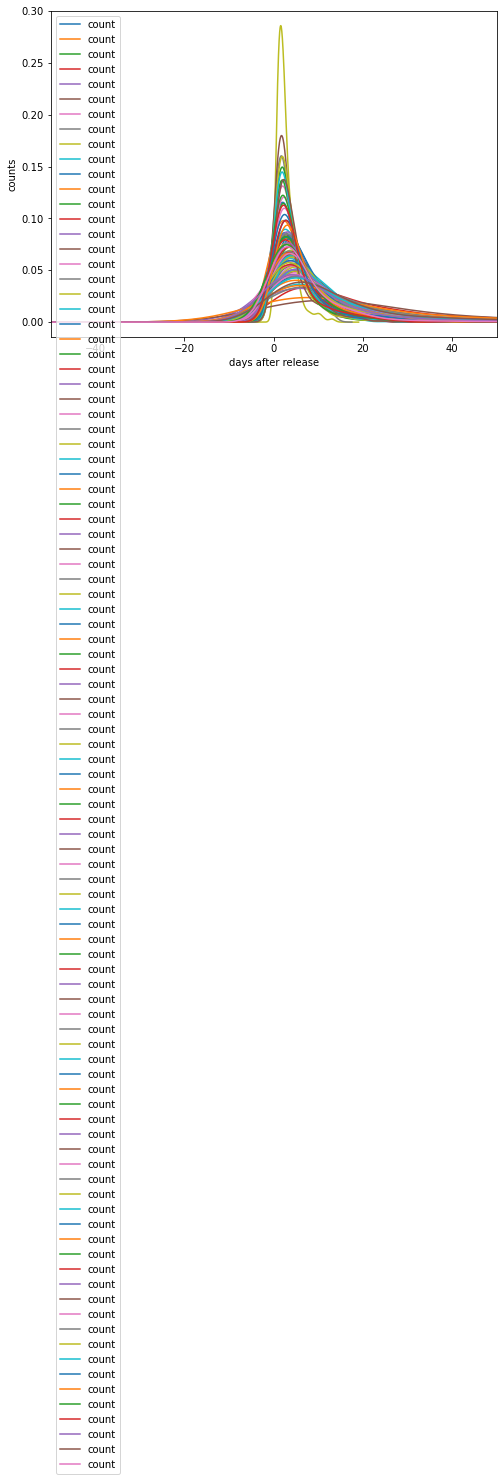

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
df_5[df_5["primaryTitle"].isin(df_top_movies["primaryTitle"])].groupby("primaryTitle").plot(x="date_diff",y="count",kind='kde',subplots=False,ax=ax)
plt.ylabel("counts")
plt.xlabel("days after release")
plt.xlim(-50,50)

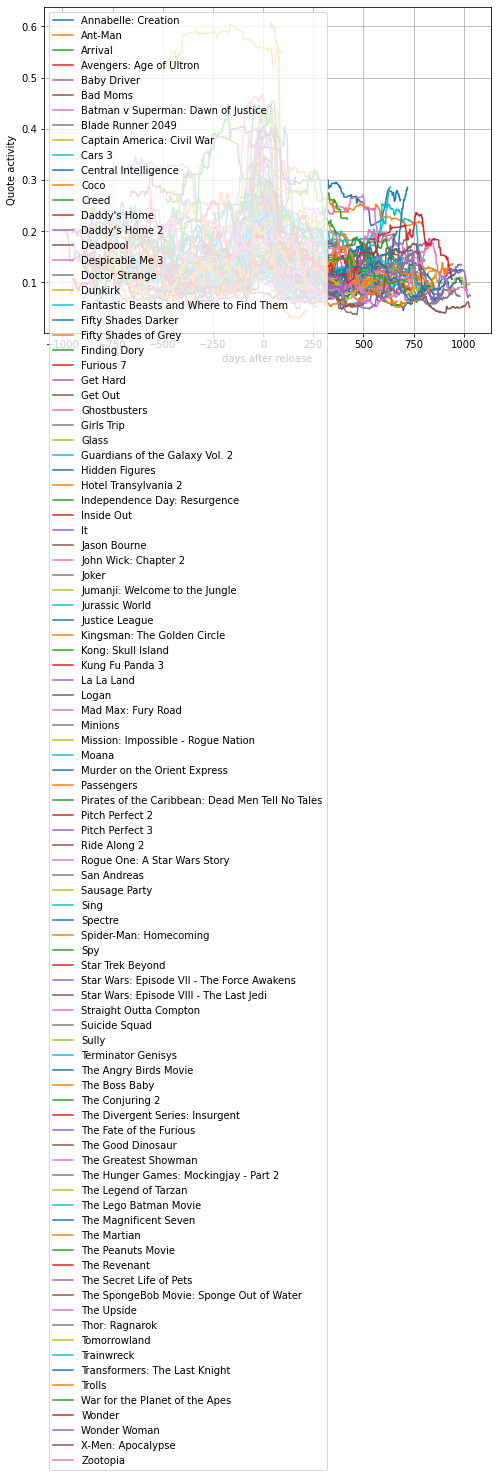

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
for name, group in df_5[df_5["primaryTitle"].isin(df_top_movies["primaryTitle"])].groupby("primaryTitle"):
    group["count"] = group["count"]/group["count"].sum()
    group.rolling(window=100,center=True,on="date_diff").sum().plot(x="date_diff",y="count",subplots=False,ax=ax,label=name)
#plt.xlim(-100,100)
plt.xlabel("days after release")
plt.ylabel("Quote activity")
plt.grid()

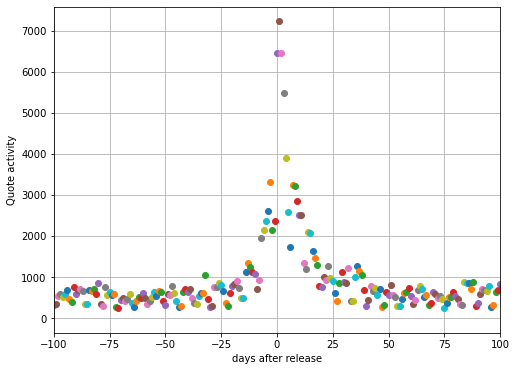

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
for name, group in df_5[df_5["primaryTitle"].isin(df_top_movies["primaryTitle"])].groupby("date_diff"):
    plt.plot(group["date_diff"].iloc[0],group["count"].sum(),linestyle="",marker="o")
    #group.rolling(window=100,center=True,on="date_diff").sum().plot(x="date_diff",y="count",subplots=False,ax=ax,label=name)
plt.xlim(-100,100)
plt.xlabel("days after release")
plt.ylabel("Quote activity")
plt.grid()

Text(0.5, 0.98, 'Quotes realated to the top US movies (2015:2017)')

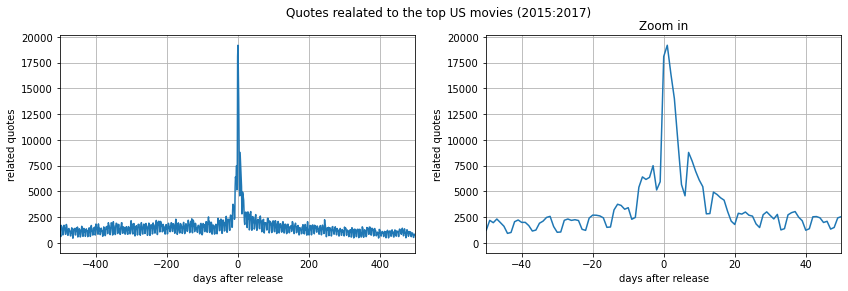

In [475]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
toto = df_5.groupby("date_diff").sum()[["count"]]
toto = toto.reset_index()
toto
sb.lineplot(x="date_diff",y="count",data=toto)
plt.xlabel("days after release")
plt.ylabel("related quotes")
plt.grid()
plt.xlim(-500,500)

plt.subplot(1,2,2)
toto = df_5.groupby("date_diff").sum()[["count"]]
toto = toto.reset_index()
toto
sb.lineplot(x="date_diff",y="count",data=toto)
plt.xlabel("days after release")
plt.ylabel("related quotes")
plt.grid()
plt.xlim(-50,50)
plt.title("Zoom in")
plt.suptitle("Quotes realated to the top US movies (2015:2017)")

#     plt.plot(group["date_diff"].iloc[0],group["count"].sum(),linestyle="",marker="o")
#     #group.rolling(window=100,center=True,on="date_diff").sum().plot(x="date_diff",y="count",subplots=False,ax=ax,label=name)

# plt.xlabel("days after release")
# plt.ylabel("Quote activity")
# plt.grid()

<AxesSubplot:xlabel='date_diff', ylabel='count'>

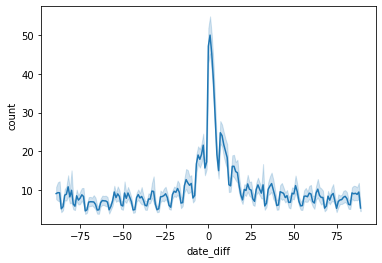

In [447]:
sb.lineplot(data=df_5[(df_5["date_diff"]<90)&(df_5["date_diff"]>-90)], x="date_diff", y="count")

In [448]:
df_4

,date,primaryTitle,Total Gross,Release Date,Year,startYear,Release_date_f,date_diff
0,2015-03-25,Carol,12711491,Nov 20,2015.0,2015.0,2015-11-20,240
5,2015-03-25,Thor: Ragnarok,315058289,Nov 3,2017.0,2017.0,2017-11-03,954
6,2015-03-25,Truth,2541854,Oct 16,2015.0,2015.0,2015-10-16,205
8,2015-10-27,Carol,12711491,Nov 20,2015.0,2015.0,2015-11-20,24
13,2015-10-27,Thor: Ragnarok,315058289,Nov 3,2017.0,2017.0,2017-11-03,738
...,...,...,...,...,...,...,...,...
3808085,2017-11-21,Kedi,2835047,Feb 10,2017.0,2016.0,2016-02-10,-650
3808089,2017-08-24,Ant-Man,180202163,Jul 17,2015.0,2015.0,2015-07-17,-769
3808090,2017-08-24,Thor: Ragnarok,315058289,Nov 3,2017.0,2017.0,2017-11-03,71
3808094,2017-11-10,Lady Bird,48958273,Nov 3,2017.0,2017.0,2017-11-03,-7


In [476]:
df_6 = df_4[df_4["date_diff"].abs()<50]
df_6=df_4.groupby(["primaryTitle"]).agg(count=("date","count"),bo=("Total Gross","first"))
df_6 = df_6[df_6["count"]>100]

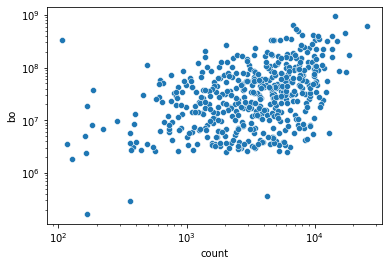

In [478]:

df_6["log_count"] = np.log(df_6["count"])
df_6["log_bo"] = np.log(df_6["bo"])
#sb.kdeplot(x=df_6["count"],y=df_6["bo"],kind="hue", fill=True)
sb.scatterplot(x=df_6["count"],y=df_6["bo"])
plt.xscale("log")
plt.yscale("log")
# plt.xlim(0,4000)
# plt.ylim(0,0.2e9)



In [481]:
df_6[df_6["count"]<110]

,count,bo,log_count,log_bo
primaryTitle,,,,
Joker,107,335451311,4.672829,19.630987


In [485]:
df_2[df_2["primaryTitle"]=="Joker"]

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,ordering_y,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
5838,5838,tt5611648,movie,Joker,Joker,0.0,2016.0,NaN,130.0,"Comedy,Drama",...,10.0,nm2877548,cinematographer,NaN,NaN,Chezhiyan,NaN,NaN,cinematographer,"tt5611648,tt2542406,tt5340516,tt3570530"
5839,5839,tt5611648,movie,Joker,Joker,0.0,2016.0,NaN,130.0,"Comedy,Drama",...,1.0,nm5626435,actor,NaN,"[""Mannar Mannan""]",Guru Somasundaram,NaN,NaN,actor,"tt5611648,tt7268738,tt3569782,tt1496729"
5840,5840,tt5611648,movie,Joker,Joker,0.0,2016.0,NaN,130.0,"Comedy,Drama",...,2.0,nm8051850,actress,NaN,"[""Malliga""]",Ramya Pandian,NaN,NaN,actress,"tt5611648,tt11312128,tt7019912,tt15415958"
5841,5841,tt5611648,movie,Joker,Joker,0.0,2016.0,NaN,130.0,"Comedy,Drama",...,3.0,nm8051851,actress,NaN,"[""Isai""]",Gayathri,NaN,NaN,actress,"tt5611648,tt9332664,tt6680730"
5842,5842,tt5611648,movie,Joker,Joker,0.0,2016.0,NaN,130.0,"Comedy,Drama",...,4.0,nm8145073,actor,NaN,"[""Ponnoonjal""]",Mu Ramaswamy,NaN,NaN,actor,"tt0497573,tt0376076,tt0458050,tt8747560"
5843,5843,tt5611648,movie,Joker,Joker,0.0,2016.0,NaN,130.0,"Comedy,Drama",...,5.0,nm6327305,director,NaN,NaN,Raju Murugan,NaN,NaN,"writer,director,actor","tt8042112,tt5611648,tt8303612,tt3569652"
5844,5844,tt5611648,movie,Joker,Joker,0.0,2016.0,NaN,130.0,"Comedy,Drama",...,6.0,nm10429120,director,co-director,NaN,Raju Saravanan,NaN,NaN,"director,assistant_director","tt3569652,tt5611648,tt9665400"
5845,5845,tt5611648,movie,Joker,Joker,0.0,2016.0,NaN,130.0,"Comedy,Drama",...,7.0,nm4272786,producer,producer,NaN,S.R. Prabhu,NaN,NaN,producer,"tt5611648,tt5867800,tt7060460,tt3822388"
5847,5847,tt5611648,movie,Joker,Joker,0.0,2016.0,NaN,130.0,"Comedy,Drama",...,8.0,nm3909481,producer,producer,NaN,S.R. Prakashbabu,NaN,NaN,producer,"tt9900782,tt3822388,tt5611648,tt7060460"
5849,5849,tt5611648,movie,Joker,Joker,0.0,2016.0,NaN,130.0,"Comedy,Drama",...,9.0,nm6353027,composer,NaN,NaN,Sean Roldan,NaN,NaN,"soundtrack,music_department,composer","tt5310090,tt5128328,tt3569782,tt3681442"


In [451]:
dft_1 = pd.merge(df_1,df_movies,how="inner",left_on="speaker",right_on="primaryName")

In [350]:
dft_1 = dft_1[["date","primaryTitle","Total Gross","Release Date","Year"]]
dft_1["Release_date_f"] = dft_1["Release Date"]+", "+dft_1["Year"].astype(int).astype(str)
dft_1["Release_date_f"] = pd.to_datetime(dft_1["Release_date_f"])
dft_1["date"] = dft_1["date"].values.astype('datetime64[D]')
dft_1["date_diff"] = (dft_1["Release_date_f"] - dft_1["date"]).dt.days
dft_5 = dft_1.groupby(["primaryTitle","date_diff"]).count().reset_index(level=[0,1])[["primaryTitle","date_diff","date"]]
dft_5["count"] = dft_5["date"]
dft_5.head()

,primaryTitle,date_diff,date,count
0,10 Cloverfield Lane,-594,10,10
1,10 Cloverfield Lane,-524,7,7
2,10 Cloverfield Lane,-495,2,2
3,10 Cloverfield Lane,-378,1,1
4,10 Cloverfield Lane,-195,1,1


Text(0.5, 0.98, 'Quotes realated to the top US movies (2015-2016)')

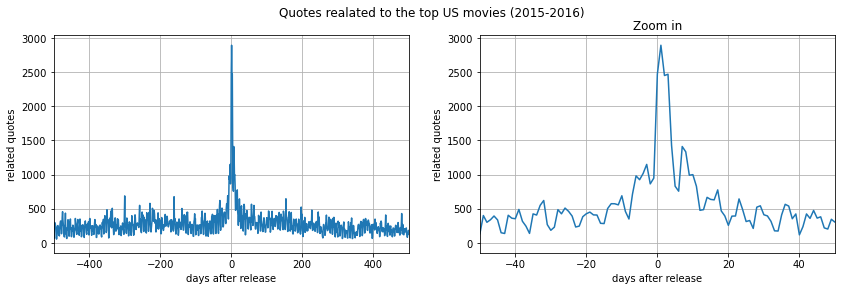

In [351]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
toto = dft_5.groupby("date_diff").sum()[["count"]]
toto = toto.reset_index()
toto
sb.lineplot(x="date_diff",y="count",data=toto)
plt.xlabel("days after release")
plt.ylabel("related quotes")
plt.grid()
plt.xlim(-500,500)

plt.subplot(1,2,2)
toto = dft_5.groupby("date_diff").sum()[["count"]]
toto = toto.reset_index()
toto
sb.lineplot(x="date_diff",y="count",data=toto)
plt.xlabel("days after release")
plt.ylabel("related quotes")
plt.grid()
plt.xlim(-50,50)
plt.title("Zoom in")
plt.suptitle("Quotes realated to the top US movies (2015-2016)")

/Users/goujon/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(


<AxesSubplot:xlabel='count', ylabel='bo'>

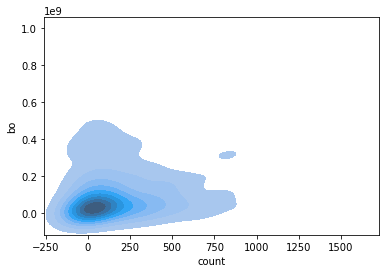

In [359]:
dft_6 = dft_1[dft_1["date_diff"].abs()<50]
dft_6=dft_6.groupby(["primaryTitle"]).agg(count=("date","count"),bo=("Total Gross","first"))
sb.kdeplot(x=dft_6["count"],y=dft_6["bo"],kind="hue", fill=True)



<AxesSubplot:xlabel='count', ylabel='bo'>

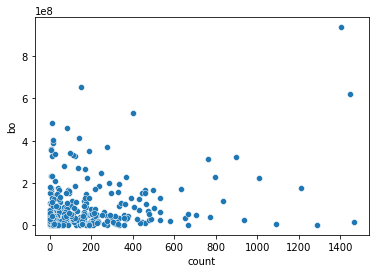

In [376]:
sb.scatterplot(x=dft_6["count"],y=dft_6["bo"])

In [424]:
dt = dft_1[dft_1["date_diff"].abs()<150]
dt = dt.groupby(["primaryTitle"]).agg(count=("date","count"),bo=("Total Gross","first"))

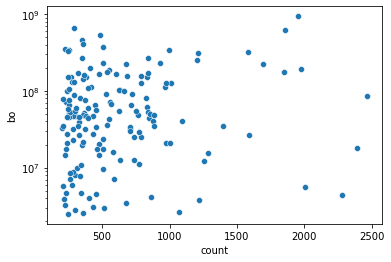

In [431]:
dt = dt[dt["count"]>200]
sb.scatterplot(x=dt["count"],y=dt["bo"])
plt.yscale("log")

In [427]:
dt[dt["count"]<=2]

,count,bo
primaryTitle,,
10 Cloverfield Lane,1,72082998
Baahubali: The Beginning,2,6738000
Baywatch,2,58060186
Birth of the Dragon,1,6901965
Captain Fantastic,1,5879835
Everybody Wants Some!!,1,3400278
Grandma,1,6980524
Huevos: Little Rooster's Egg-cellent Adventure,1,9080818
Just Getting Started,1,6069605


In [387]:
dftt = df_3[(df_3["primaryTitle"]=="The Zookeeper's Wife")&(df_3["date"]>"2017-02-07 22:43:14")&(df_3["date"]<"2017-04-07 22:43:14")][["date","Release Date","Year"]]
dftt["Release_date_f"] = dftt["Release Date"]+", "+dftt["Year"].astype(int).astype(str)
dftt["Release_date_f"] = pd.to_datetime(dftt["Release_date_f"])
dftt["date"] = dftt["date"].values.astype('datetime64[D]')
dftt["date_diff"] = (dftt["Release_date_f"] - dftt["date"]).dt.days

In [389]:
dftt[dftt["date_diff"].abs()<150]

,date,Release Date,Year,Release_date_f,date_diff
234004,2017-03-29,Mar 31,2017.0,2017-03-31,2
234040,2017-03-22,Mar 31,2017.0,2017-03-31,9
234067,2017-03-28,Mar 31,2017.0,2017-03-31,3
234085,2017-03-30,Mar 31,2017.0,2017-03-31,1
234175,2017-03-01,Mar 31,2017.0,2017-03-31,30
...,...,...,...,...,...
3806478,2017-03-28,Mar 31,2017.0,2017-03-31,3
3806479,2017-03-28,Mar 31,2017.0,2017-03-31,3
3806480,2017-03-13,Mar 31,2017.0,2017-03-31,18
3806481,2017-04-07,Mar 31,2017.0,2017-03-31,-7


In [408]:
dft_1[(dft_1["date_diff"].abs()<50)&(dft_1["primaryTitle"]=="The Zookeeper's Wife")].size

7

In [409]:
dft_2 = dft_1[(dft_1["date_diff"].abs()<50)]

In [405]:
dft_2 = dft_2.groupby("primaryTitle").sum().reset_index()

In [406]:
dft_2[(dft_2["primaryTitle"]=="The Zookeeper's Wife")]

,primaryTitle,date,Total Gross,Release Date,Year,Release_date_f,date_diff
341,The Zookeeper's Wife,1,1,1,1,1,1


In [422]:
dft_t = dft_5[dft_5["date_diff"].abs()<80]
dft_t = dft_t.groupby("primaryTitle").count().reset_index()

<AxesSubplot:xlabel='date_diff'>

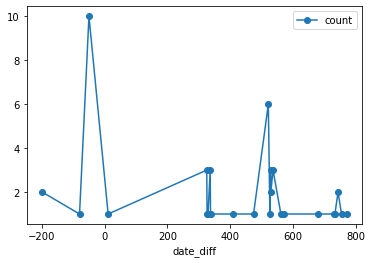

In [423]:
dft_5[(dft_5["primaryTitle"]=="The Zookeeper's Wife")].plot(x="date_diff",y="count", marker="o")